In [1]:
import glob
import time
import random
import numpy
from matplotlib import pyplot
from deap import base, creator, tools
from genetic_algorithm import ga
from genetic_algorithm.tools import parse_dimacs, plot_ga_progress

In [2]:
file = 'data/sat/uf20-010.cnf'
!head $file

c This Formular is generated by mcnf
c
c    horn? no 
c    forced? no 
c    mixed sat? no 
c    clause length = 3 
c
p cnf 20  91 
 -11 9 12 0
-7 -17 -18 0


In [3]:
n, m, cnf = parse_dimacs(file)
n, m

(20, 91)

In [4]:
weights = numpy.random.randint(1, 1024 + 1, size=n)
weights

array([152, 567, 715, 646, 540, 797, 697, 870, 510, 535, 823, 347, 241,
       417, 993, 358, 934, 815, 190, 543])

In [6]:
def fitness(individual, cnf, weights):
    m = len(cnf)
    # evaluate formula
    satisfied_clauses = 0
    for clause in cnf:
        for v in clause:
            idx = abs(v) - 1
            bit = individual[idx]
            if (v < 0 and bit == 0) or (v > 0 and bit == 1):
                satisfied_clauses += 1
                break
    # if satisfied sum weights
    if m == satisfied_clauses:
        return (sum(v * w for v, w in zip(individual, weights)),)
    else:
        return (satisfied_clauses - m,)

In [7]:
# fitness value is maximalized
creator.create('Fitness', base.Fitness, weights=(1,))
creator.create('Individual', list, fitness=creator.Fitness)

In [8]:
N_POP = 500
CXPB = 0.6
INDPB = 0.001

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, n)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=INDPB)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', fitness, cnf=cnf, weights=weights)

gen	new	min	max	avg    	std    
0  	500	-23	-3 	-11.596	3.53791
1  	498	-6 	-3 	-3.03206	0.259052
2  	498	-6 	-3 	-3.02204	0.231565
3  	499	-9 	-3 	-3.038  	0.364082
4  	498	-5 	-3 	-3.02405	0.198751
5  	498	-5 	-3 	-3.01603	0.178345
6  	496	-9 	-3 	-3.05231	0.431738
7  	499	-6 	-3 	-3.01   	0.147986
8  	497	-9 	-3 	-3.01406	0.272212
9  	499	-9 	-3 	-3.03   	0.324191
10 	498	-9 	-3 	-3.03607	0.361889
11 	497	-5 	-3 	-3.01807	0.172609
12 	498	-9 	-3 	-3.02405	0.31563 
13 	498	-5 	-3 	-3.03206	0.2347  
14 	496	-9 	-3 	-3.05835	0.460312
15 	499	-5 	-3 	-3.018  	0.172267
16 	496	-9 	-3 	-3.02616	0.312902
17 	497	-5 	-3 	-3.01807	0.172609
18 	498	-6 	-3 	-3.02405	0.217986
19 	498	-6 	-3 	-3.02204	0.213556
20 	499	-5 	-3 	-3.02   	0.177764
21 	498	-6 	-3 	-3.02204	0.222743
22 	499	-6 	-3 	-3.012  	0.166901
23 	499	-9 	-3 	-3.028  	0.314986
24 	498	-9 	-3 	-3.03006	0.324513
25 	496	-5 	-3 	-3.0161 	0.140931
26 	498	-5 	-3 	-3.01804	0.160396
27 	499	-6 	-3 	-3.022  	0.183074
28 	499	-5 	-3 	-3

236	498	-10	-3 	-3.01403	0.313049 
237	497	-4 	-3 	-3.00402	0.063245 
238	498	-10	-3 	-3.04409	0.392898 
239	496	-4 	-3 	-3.00805	0.0893505
240	499	-6 	-3 	-3.03   	0.247184 
241	496	-5 	-3 	-3.01811	0.160714 
242	499	-10	-3 	-3.03   	0.342199 
243	498	-5 	-3 	-3.01202	0.141051 
244	497	-4 	-3 	-3.00803	0.0892615
245	498	-5 	-3 	-3.02204	0.171971 
246	498	-5 	-3 	-3.02004	0.188866 
247	498	-6 	-3 	-3.01804	0.194296 
248	498	-6 	-3 	-3.02405	0.20859  
249	497	-5 	-3 	-3.04016	0.258186 
250	496	-5 	-3 	-3.01408	0.161117 
251	497	-5 	-3 	-3.01606	0.166896 
252	498	-5 	-3 	-3.03006	0.239192 
253	499	-6 	-3 	-3.034  	0.262381 
254	499	-6 	-3 	-3.014  	0.183859 
255	497	-9 	-3 	-3.04217	0.369832 
256	499	-5 	-3 	-3.018  	0.172267 
257	499	-9 	-3 	-3.03   	0.330303 
258	498	-9 	-3 	-3.03206	0.333461 
259	498	-6 	-3 	-3.01603	0.178345 
260	497	-9 	-3 	-3.04418	0.427536 
261	496	-9 	-3 	-3.02817	0.315927 
262	497	-9 	-3 	-3.04016	0.344774 
263	499	-6 	-3 	-3.02   	0.208806 
264	499	-5 	-3 	-3.0

471	498	-3 	-1 	-1.02004	0.17794  
472	499	-5 	-1 	-1.048  	0.360133 
473	498	-4 	-1 	-1.02004	0.199195 
474	499	-4 	-1 	-1.02   	0.198997 
475	499	-4 	-1 	-1.018  	0.18351  
476	499	-5 	-1 	-1.034  	0.269896 
477	499	-5 	-1 	-1.034  	0.284331 
478	498	-5 	-1 	-1.04409	0.332085 
479	499	-3 	-1 	-1.038  	0.237815 
480	497	-4 	-1 	-1.02008	0.189054 
481	499	-4 	-1 	-1.022  	0.231335 
482	497	-3 	-1 	-1.01004	0.118133 
483	498	-4 	-1 	-1.01603	0.178345 
484	498	-3 	-1 	-1.02405	0.198751 
485	498	-3 	-1 	-1.01202	0.141051 
486	496	-4 	-1 	-1.02213	0.194267 
487	497	-5 	-1 	-1.0261 	0.239899 
488	499	-4 	-1 	-1.034  	0.254645 
489	499	-5 	6560	12.072  	293.126  
490	499	-3 	6560	6441.89 	872.366  
491	499	-3 	6560	6415.64 	962.536  
492	499	-4 	6560	6455.02 	823.305  
493	499	-3 	6560	6468.13 	771.023  
494	499	-4 	6560	6494.38 	652.951  
495	499	-3 	6560	6428.76 	918.666  
496	499	-3 	6560	6415.64 	962.523  
497	499	-3 	6560	6441.89 	872.41   
498	499	-3 	6560	6455.01 	823.368  
499	499	-4

700	499	-4 	6560	6441.87 	872.499  
701	499	-4 	6560	6376.27 	1082.5   
702	499	-3 	6560	6455.01 	823.383  
703	499	-4 	6560	6441.88 	872.44   
704	499	-4 	6560	6428.76 	918.666  
705	499	-3 	6560	6455.02 	823.305  
706	499	-3 	6560	6428.76 	918.652  
707	499	-4 	6560	6441.88 	872.44   
708	499	-2 	6560	6441.89 	872.41   
709	499	-4 	6560	6468.13 	771.023  
710	499	-3 	6560	6415.65 	962.469  
711	499	-3 	6560	6468.14 	770.939  
712	499	-3 	6560	6428.76 	918.652  
713	499	-4 	6560	6455    	823.399  
714	499	-3 	6560	6415.64 	962.509  
715	499	-3 	6560	6415.64 	962.483  
716	499	-3 	6560	6494.38 	652.931  
717	499	-4 	6560	6415.63 	962.563  
718	499	-4 	6560	6415.63 	962.603  
719	499	-2 	6560	6494.38 	652.891  
720	499	-3 	6560	6455    	823.399  
721	499	-2 	6560	6415.64 	962.483  
722	499	-4 	6560	6415.63 	962.589  
723	499	-4 	6560	6389.4  	1044.18  
724	499	-2 	6560	6468.14 	770.905  
725	499	-4 	6560	6363.14 	1119.4   
726	499	-4 	6560	6389.39 	1044.26  
727	499	-4 	6560	6323.76 	12

[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]

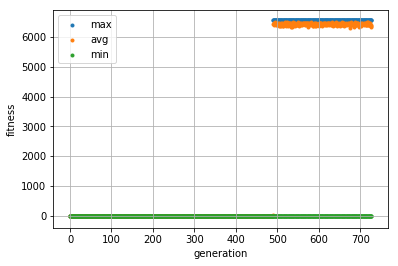

In [10]:
population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 50), cxpb=CXPB, mutpb=1, elitism=1, verbose=True
)

plot_ga_progress(logbook)

halloffame[0]